In [12]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [36]:
arxiv_collab_edges = pd.read_csv("edges.csv")
arxiv_collab_edges = arxiv_collab_edges[(arxiv_collab_edges['# source'] <= 1000) & (arxiv_collab_edges[' target'] <= 1000)]
print(arxiv_collab_edges.columns)
print(arxiv_collab_edges.shape)
arxiv_collab_edges.head()

Index(['# source', ' target', ' value'], dtype='object')
(1686, 3)


,# source,target,value
0,2,1,1.00000
1,4,3,2.50000
2,5,3,14.08330
3,5,4,1.50000
4,6,3,3.33333


In [37]:
arxiv_collab_nodes = pd.read_csv("nodes.csv")
arxiv_collab_nodes = arxiv_collab_nodes[:1000]
print(arxiv_collab_nodes.columns)
arxiv_collab_nodes.head()

Index(['# index', ' label', ' _pos'], dtype='object')


,# index,label,_pos
0,0,"RADZIHOVSKY, L","array([ 2.15910814, -34.8261178 ])"
1,1,"FRISCHAT, SD","array([ 45.89499666, -295.11245777])"
2,2,"KUHN, R","array([ 47.16587639, -293.49424253])"
3,3,"BEENAKKER, CWJ","array([ 43.69916587, -36.42049878])"
4,4,"MELSEN, JA","array([ 48.01931569, -26.81243596])"


In [38]:
arxiv_graph = nx.from_pandas_edgelist(arxiv_collab_edges, "# source", " target", edge_attr=" value")

In [39]:
node_labels_dict = arxiv_collab_nodes.set_index("# index")[" label"].to_dict()
nx.relabel_nodes(arxiv_graph, node_labels_dict, copy=False) # zmiana nazw wierzchołków na podstawie słownika

In [40]:
weights = np.array([e[2][" value"] for e in arxiv_graph.edges(data=True)])
max_weight = np.max(weights)

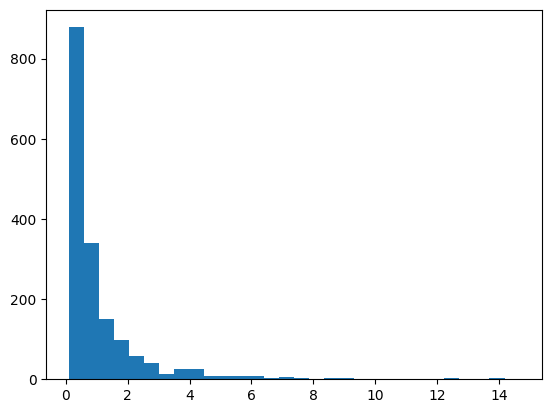

In [41]:
plt.hist(weights, bins=30) # pomocniczy wykres do ustalenia legendy szerokości krawędzi
plt.show()

In [42]:
node_degree = dict(arxiv_graph.degree(weight = " value"))
node_size = np.array([node_degree[n] for n in arxiv_graph.nodes()])

In [43]:
pos = nx.kamada_kawai_layout(arxiv_graph)

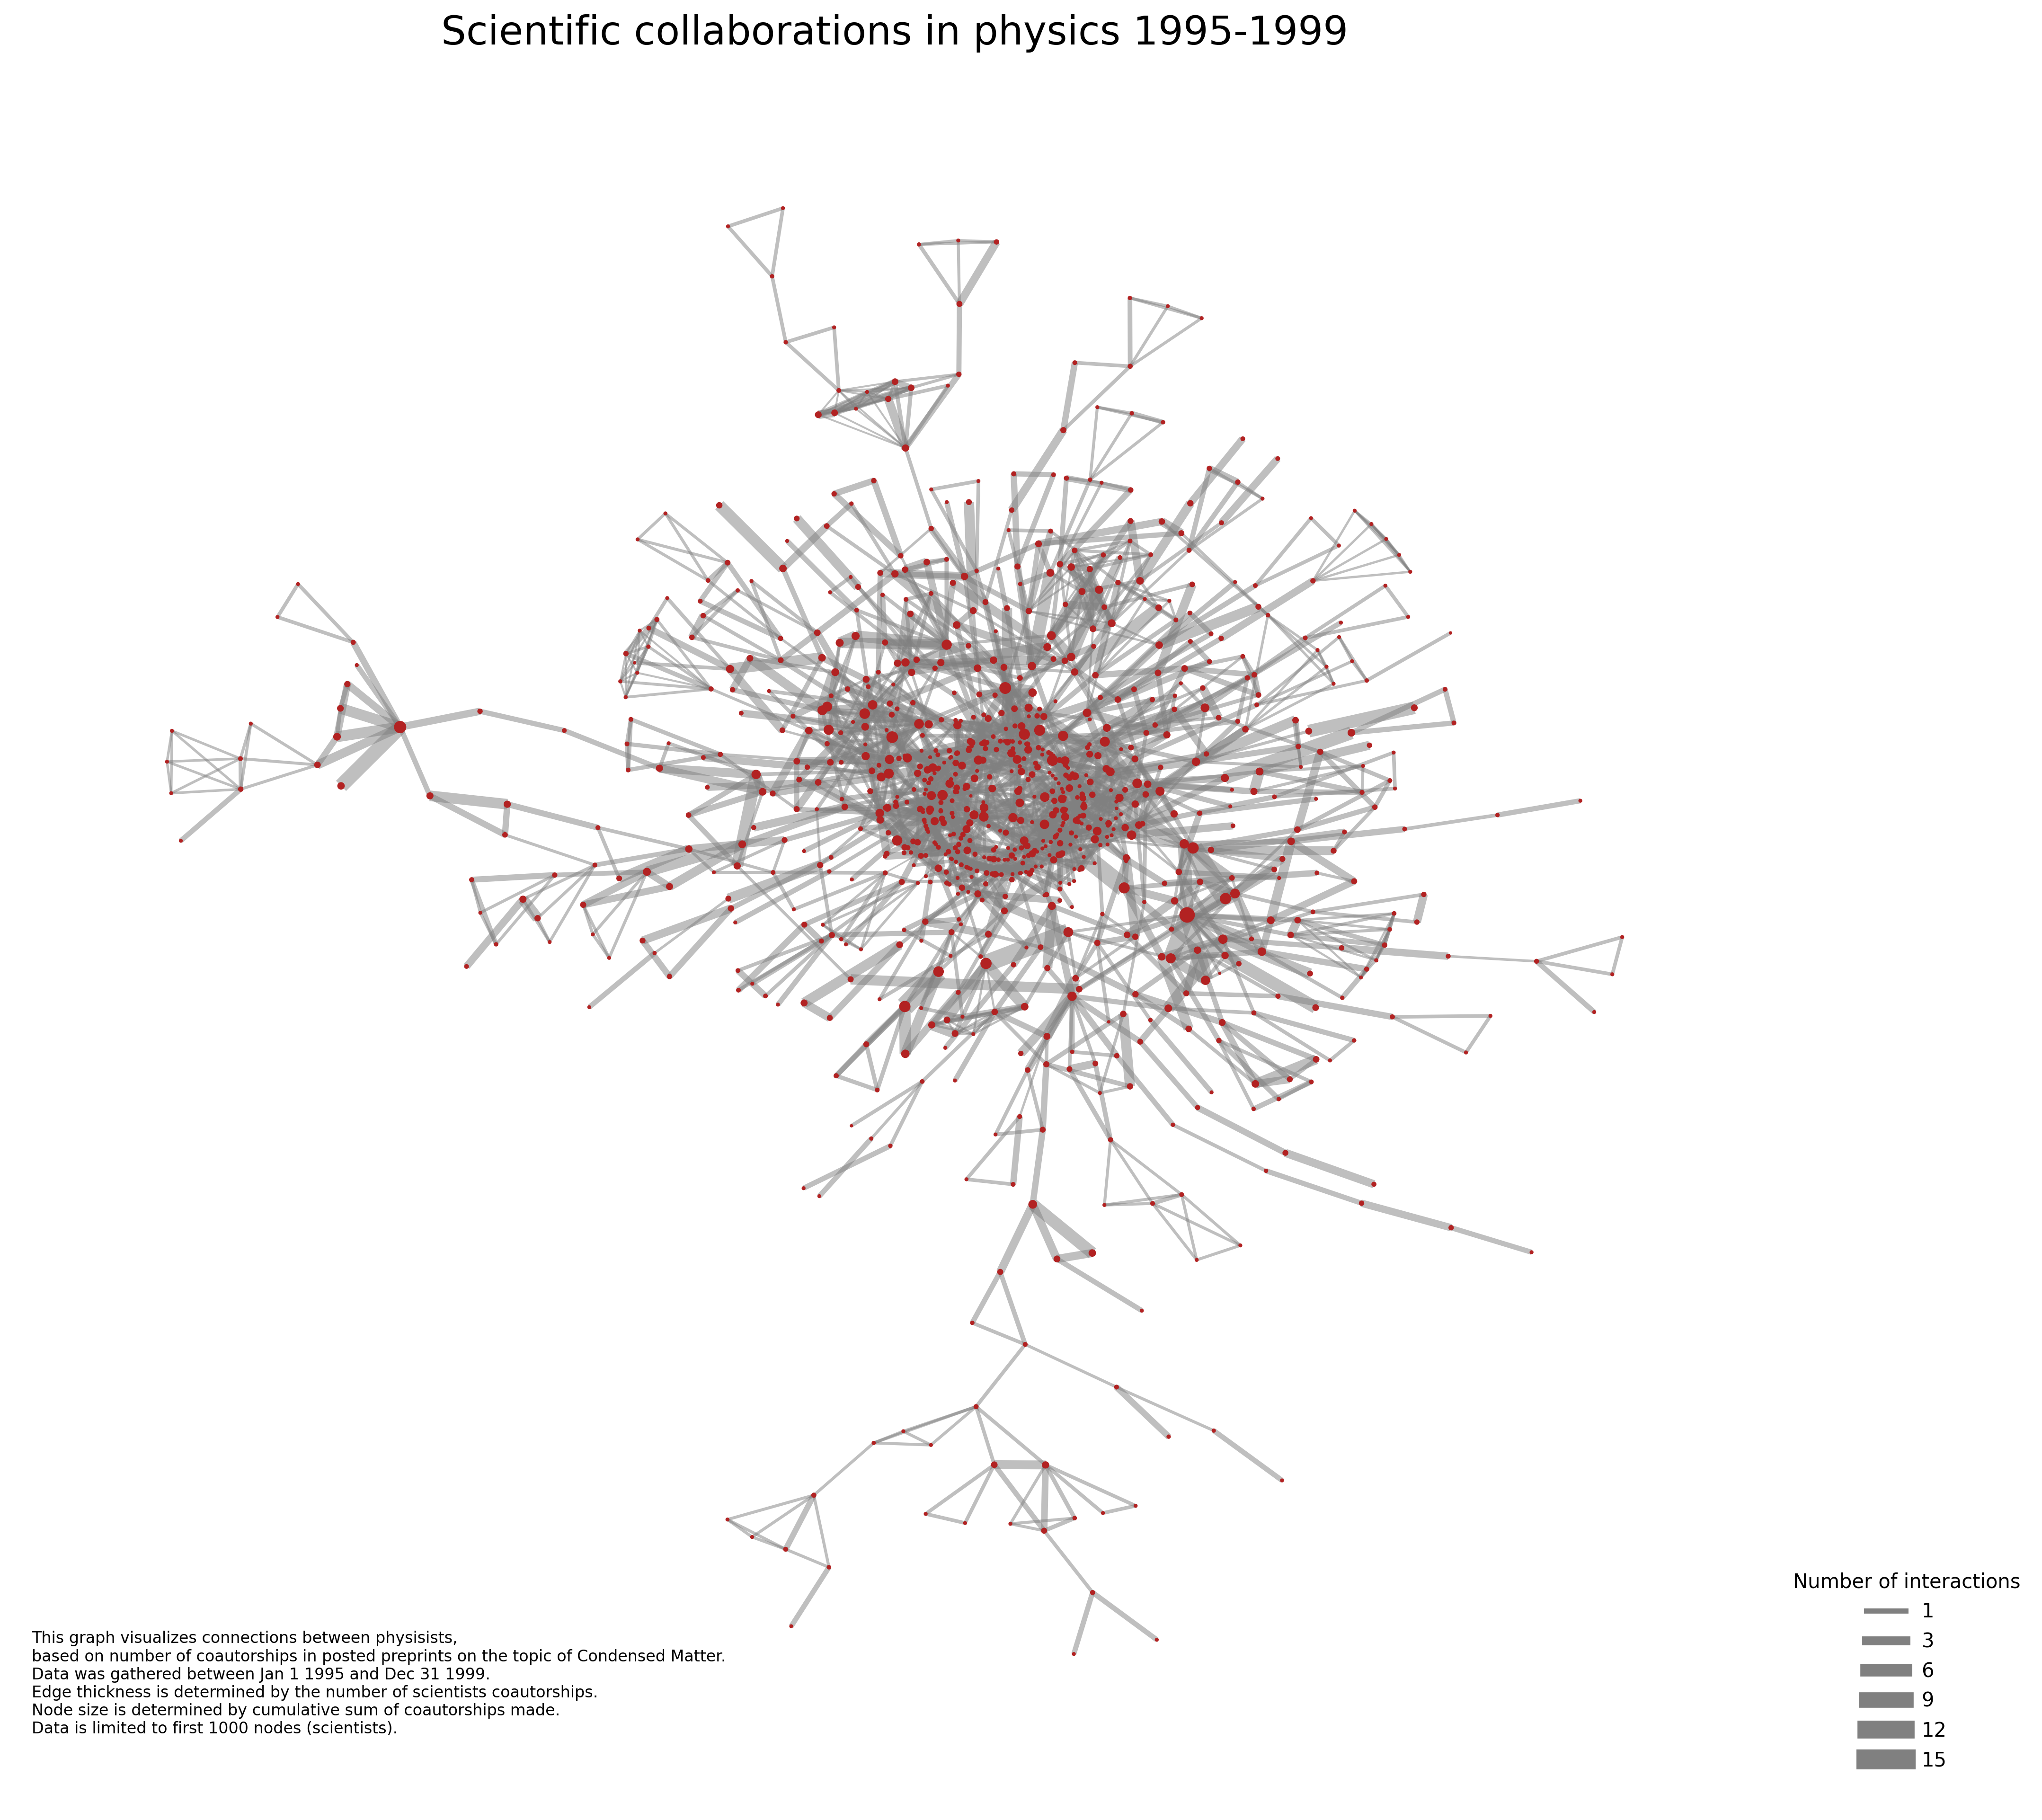

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi = 300)

# rysowanie warstwowo w celu lepszej kontroli (np. różny poziom przezroczystości)
ax.set_title("Scientific collaborations in physics 1995-1999", fontsize=20)

nx.draw_networkx_nodes(arxiv_graph,
    pos=pos,
    node_color="firebrick",
    node_size=node_size,
    ax=ax
)

nx.draw_networkx_edges(
    arxiv_graph,
    pos=pos,
    width=np.sqrt(weights / max_weight) * 10,
    edge_color="gray",
    alpha=0.5, # półprzezroczyste krawędzie
    ax=ax,
)


for w in [1, 3, 6, 9, 12, 15]:
    ax.plot([], [], "gray", linewidth=np.sqrt(w) / np.sqrt(max_weight) * 10, label=w)
ax.legend(title="Number of interactions", frameon=False, bbox_to_anchor=(1, 0.01), loc = "lower left")
ax.text(0.01, 0.1,
"""This graph visualizes connections between physisists,
based on number of coautorships in posted preprints on the topic of Condensed Matter.
Data was gathered between Jan 1 1995 and Dec 31 1999.
Edge thickness is determined by the number of scientists coautorships.
Node size is determined by cumulative sum of coautorships made.
Data is limited to first 1000 nodes (scientists).
""",
    fontsize=8,
    transform=ax.transAxes,
    verticalalignment="top" ) # określamy bezwzględne współrzędne tekstu
plt.axis("off")
plt.show()

In [49]:
fig.savefig("Scientific collaborations in physics 1995-1999.png", dpi=500, bbox_inches="tight")